# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [169]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [170]:
df = pd.read_csv('craftcans.csv')

## How many rows do you have in the data? What are the column types?

In [171]:
print(f"There are {df.shape[0]} rows")

There are 2416 rows


In [172]:
print(df.dtypes)

Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [173]:
df.groupby('Brewery')['Beer'].count().sort_values(ascending=False).head(n=10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Beer, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [174]:
df['ABV'].value_counts().head(n=1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [175]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [176]:
df['ABV'] = df['ABV'].str.replace('%', '')

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [177]:
df['ABV'] = df['ABV'].astype(float)
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [178]:
f"The mean is {round(df['ABV'].mean(), 2)}% and the median is {round(df['ABV'].median(), 2)}%"

'The mean is 5.98% and the median is 5.6%'

<AxesSubplot:>

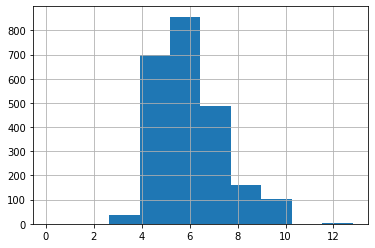

In [179]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [180]:
beer_num = df['ABV'].isnull().value_counts()[1]
f"There are {beer_num} beers without ABV"

'There are 68 beers without ABV'

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [181]:
df['Location'].value_counts().head(n=10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [182]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [183]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts().head(n=1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [184]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(n=5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [185]:
df[df['Location'].str.contains('.*, NY', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [186]:
ny_brewery_num = df[df['Location'].str.contains('.*, NY', na=False)]['Brewery'].nunique()
f"There are {ny_brewery_num} breweries in New York"

'There are 16 breweries in New York'

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [187]:
df[df['Style'].str.contains('.*IPA.*', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [188]:
df = pd.read_csv('craftcans.csv', na_values=['Does not apply'])
df['ABV'] = df['ABV'].str.replace('%', '')
df['ABV'] = df['ABV'].astype(float)

round(df['IBUs'].mean(), 2)

42.71

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

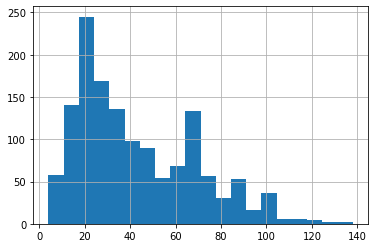

In [189]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [190]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [191]:
df[df['IBUs'] > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [192]:
df[df['IBUs'] < 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [193]:
df.sort_values(by='IBUs', ascending=False)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
1662,Bitter Bitch Imperial IPA,Astoria Brewing Company,"Astoria, OR",American Double / Imperial IPA,12 oz.,8.2,138.0
989,Troopers Alley IPA,Wolf Hills Brewing Company,"Abingdon, VA",American IPA,12 oz.,5.9,135.0
611,Dead-Eye DIPA,Cape Ann Brewing Company,"Gloucester, MA",American Double / Imperial IPA,16 oz.,9.0,130.0
249,Bay of Bengal Double IPA (2014),Christian Moerlein Brewing Company,"Cincinnati, OH",American Double / Imperial IPA,12 oz.,8.9,126.0
1537,Heady Topper,The Alchemist,"Waterbury, VT",American Double / Imperial IPA,16 oz.,8.0,120.0
...,...,...,...,...,...,...,...
2378,Atlantic Amber Ale (2007),New England Brewing Company,"Woodbridge, CT",American Amber / Red Ale,12 oz.,5.0,NaN
2379,Sea Hag IPA (Current),New England Brewing Company,"Woodbridge, CT",American IPA,12 oz.,6.2,NaN
2388,Urban Wilderness Pale Ale,Sleeping Lady Brewing Company,"Anchorage, AK",English Pale Ale,12 oz.,4.9,NaN
2389,Very Noddy Lager (Current),Buckbean Brewing Company,"Reno, NV",Schwarzbier,16 oz.,9.9,NaN


array([[<AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'IBUs'}>]], dtype=object)

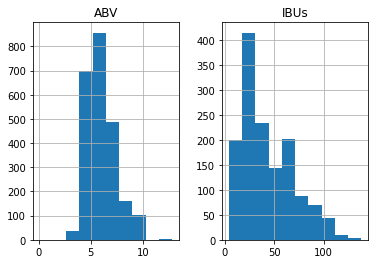

In [194]:
df.sort_values(by='IBUs').hist()

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [195]:
high_ibu = df[df['IBUs'] > 64]
high_ibu.groupby('Style')['Beer'].count().sort_values(ascending=False).head(n=5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Beer, dtype: int64

In [196]:
low_ibu = df[df['IBUs'] < 21]
low_ibu.groupby('Style')['Beer'].count().sort_values(ascending=False).head(n=5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [197]:
wheat_beers_ibu = df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs']
round(wheat_beers_ibu.mean(), 2)

18.98

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

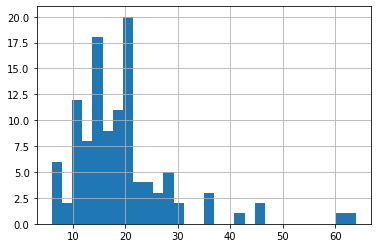

In [198]:
wheat_beers_ibu.hist(bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [199]:
ipa_beers_ibu = df[df['Style'].str.contains('.*IPA.*', na=False)]['IBUs']
round(ipa_beers_ibu.mean(), 2)

71.95

<AxesSubplot:>

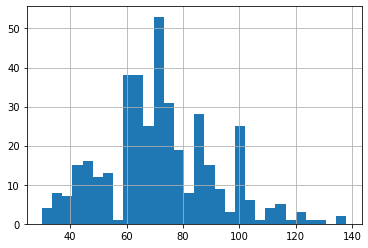

In [200]:
ipa_beers_ibu.hist(bins=30)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

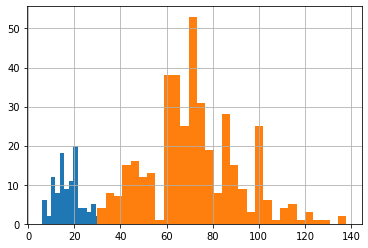

In [201]:
ax = wheat_beers_ibu.hist(bins=30)
ipa_beers_ibu.hist(ax=ax, bins=30)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [202]:
wheat_beers_abv = df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV']
round(wheat_beers_abv.mean(), 2)

5.04

In [203]:
ipa_beers_abv = df[df['Style'].str.contains('.*IPA.*', na=False)]['ABV']
round(ipa_beers_abv.mean(), 2)

6.88

<AxesSubplot:>

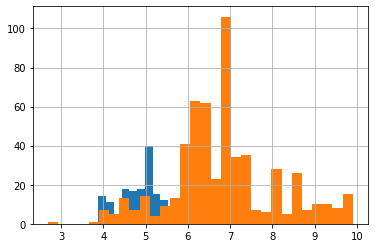

In [204]:
ax = wheat_beers_abv.hist(bins=30)
ipa_beers_abv.hist(ax=ax, bins=30)

## Good work!

If you made it this far you deserve a drink.

In [205]:
print("GULP")

GULP
